<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


In [174]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat
!pip install --upgrade yfinance pandas
!pip install bs4==4.10.0 
!pip install html5lib==1.1 
!pip install nbformat
!pip install nbformat --upgrade

  Using cached yfinance-0.2.38-py2.py3-none-any.whl.metadata (11 kB)
Using cached yfinance-0.2.38-py2.py3-none-any.whl (72 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.41
    Uninstalling yfinance-0.2.41:
      Successfully uninstalled yfinance-0.2.41
  Using cached yfinance-0.2.41-py2.py3-none-any.whl.metadata (11 kB)
Using cached yfinance-0.2.41-py2.py3-none-any.whl (73 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.38
    Uninstalling yfinance-0.2.38:
      Successfully uninstalled yfinance-0.2.38


ERROR: Could not find a version that satisfies the requirement bs4==4.10.0 (from versions: 0.0.0, 0.0.1, 0.0.2)
ERROR: No matching distribution found for bs4==4.10.0


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


In [176]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import pandas as pd
import warnings

In [60]:
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [178]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use yfinance to Extract Stock Data

In [180]:

import yfinance as yf
import pandas as pd

# Fetch the Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical market data
tesla_data = tesla.history(period="max")

# Ensure the index is a DatetimeIndex
if not isinstance(tesla_data.index, pd.DatetimeIndex):
    tesla_data.index = pd.to_datetime(tesla_data.index)

# If the index is already tz-aware, use tz_convert directly
if tesla_data.index.tz is None:
    tesla_data.index = tesla_data.index.tz_localize("UTC")

tesla_data.index = tesla_data.index.tz_convert("America/New_York")

# Reset index to get a column for date
tesla_data.reset_index(inplace=True)

# Drop any rows with missing values
tesla_data.dropna(inplace=True)

# Display the first few rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Use Webscraping to Extract Tesla Revenue Data


In [182]:
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text
tables=pd.read_html(html_data)
tesla_revenue=tables[1]
tesla_revenue.reset_index(drop=True, inplace=True)
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue.dropna(inplace=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
print(tesla_revenue.tail(5))

          Date  Revenue
48  2010-09-30       31
49  2010-06-30       28
50  2010-03-31       21
52  2009-09-30       46
53  2009-06-30       27


Use yfinance to Extract Stock Data


In [184]:

gme = yf.Ticker("GME")
gme_data= gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.dropna(inplace=True)

numeric_columns = gme_data.select_dtypes(include=['float64', 'int64']).columns
gme_data[numeric_columns] = gme_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(gme_data.head(5))



                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Use Webscraping to Extract GME Revenue Data


In [186]:

warnings.filterwarnings("ignore", category=FutureWarning)
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text
tables=pd.read_html(html_data)
gme_revenue=tables[1]
gme_revenue.reset_index(drop=True, inplace=True)
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue.dropna(inplace=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$', "", regex=True)
print(gme_revenue.tail(5))

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


Parse the html data using `beautiful_soup`.


Plot Tesla Stock Graph

C:\Users\pst\AppData\Local\Temp\ipykernel_2444\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\pst\AppData\Local\Temp\ipykernel_2444\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



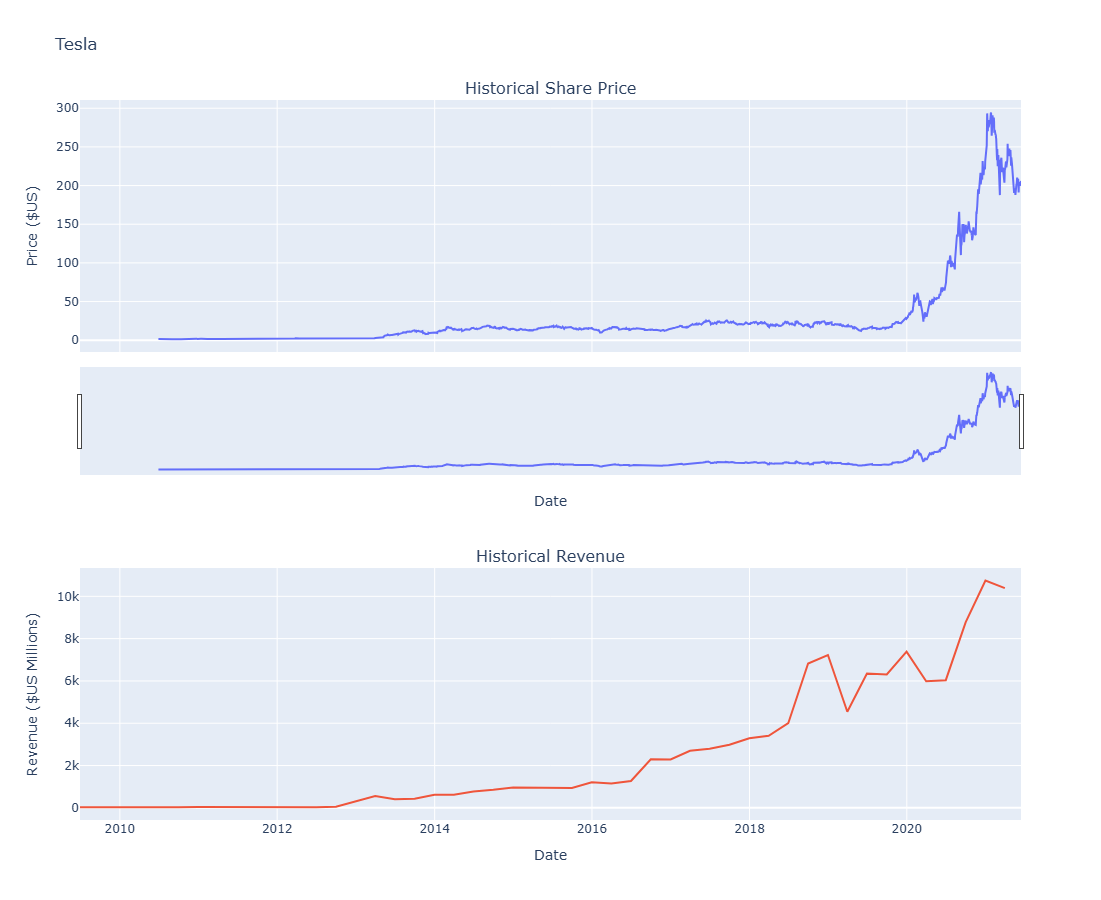

In [188]:
warnings.filterwarnings("ignore", category=FutureWarning)
make_graph(tesla_data,tesla_revenue, "Tesla")

Plot GameStop Stock Graph

C:\Users\pst\AppData\Local\Temp\ipykernel_2444\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\pst\AppData\Local\Temp\ipykernel_2444\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



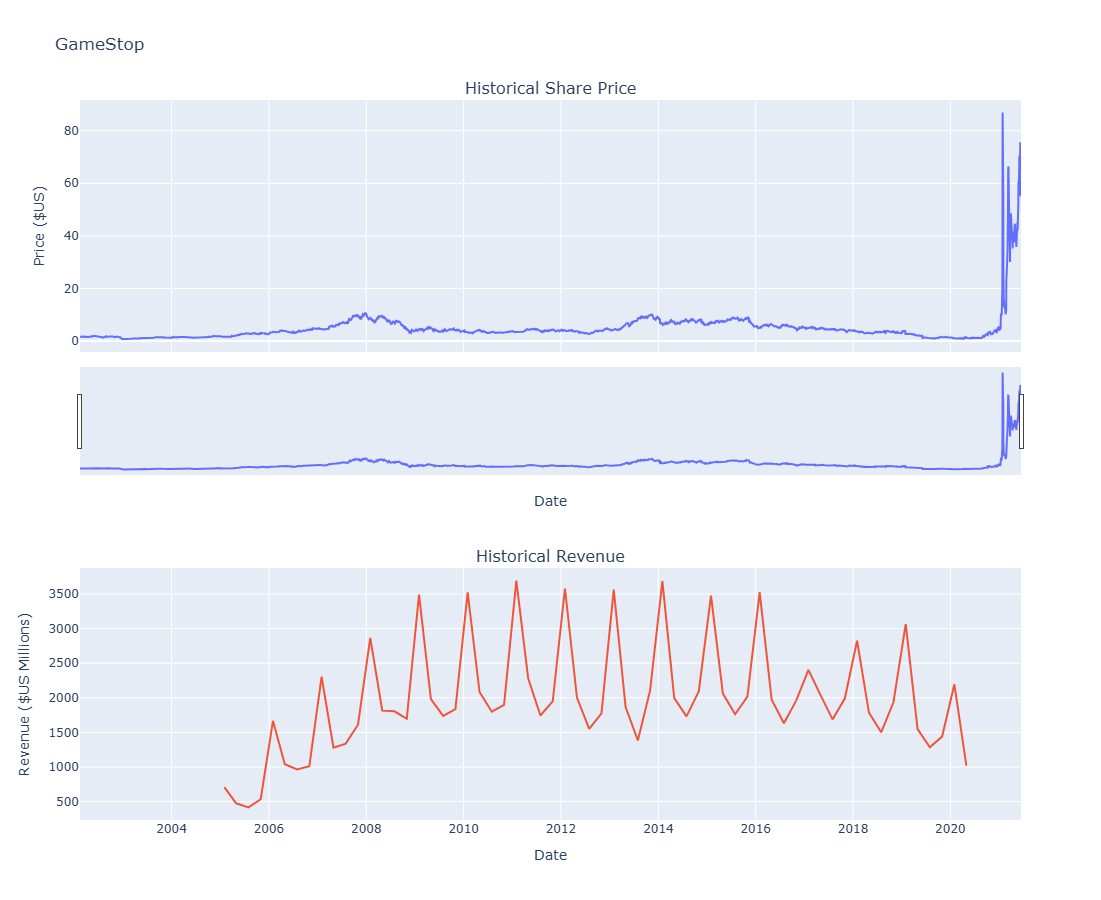

In [190]:

make_graph(gme_data, gme_revenue, "GameStop")